In [1]:
# do statistical analysis on the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ml_data import get_ml_data

In [2]:
env_n = 1

In [3]:
X, y = get_ml_data(env_n, 'X', True)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
data = pd.concat([X, y], axis=1)
_, y = get_ml_data(env_n, 'Y', True)
y = pd.DataFrame(y)
data = pd.concat([data, y], axis=1)

In [4]:
print(data)

       AP_1_RSSI  AP_2_RSSI  AP_3_RSSI  AP_4_RSSI  AP_5_RSSI  AP_6_RSSI  \
0          -53.0      -45.0      -51.0      -24.0      -19.0      -26.0   
1          -48.0      -39.0      -43.0      -45.0      -22.0      -47.0   
2          -33.0      -30.0      -33.0      -51.0      -30.0      -52.0   
3          -50.0      -40.0      -47.0      -45.0      -19.0      -45.0   
4          -54.0      -39.0      -54.0      -28.0      -15.0      -23.0   
...          ...        ...        ...        ...        ...        ...   
17271      -54.0      -36.0      -54.0      -35.0      -11.0      -38.0   
17272      -38.0      -50.0      -59.0      -52.0      -37.0      -22.0   
17273      -22.0      -33.0      -46.0      -57.0      -47.0      -33.0   
17274      -64.0      -55.0      -46.0      -24.0      -29.0      -36.0   
17275      -35.0      -32.0      -43.0      -57.0      -41.0      -43.0   

       AP_1_LOC_X  AP_1_LOC_Y  AP_2_LOC_X  AP_2_LOC_Y  AP_3_LOC_X  AP_3_LOC_Y  \
0       -4.525536 

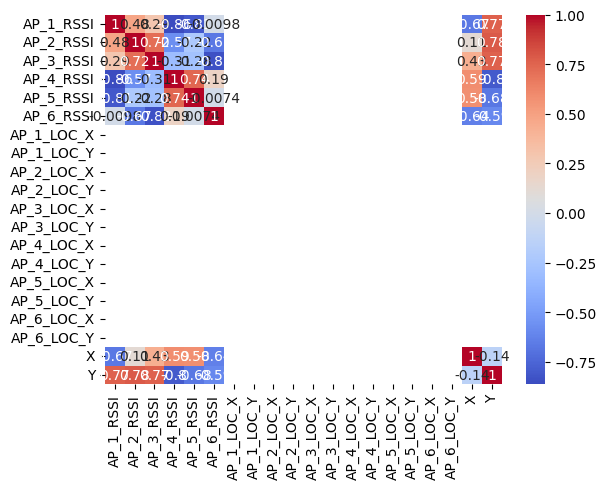

In [9]:
# correlation matrix where -1 and 1 are emphasized and 0 is not
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# rank the features by correlation with the output
correlation = corr["X"].sort_values(ascending=False)
print(correlation)
correlation = corr["Y"].sort_values(ascending=False)
print(correlation)

X             1.000000
AP_4_RSSI     0.587931
AP_5_RSSI     0.583497
AP_3_RSSI     0.431771
AP_2_RSSI     0.113752
Y            -0.136062
AP_6_RSSI    -0.637099
AP_1_RSSI    -0.672336
AP_1_LOC_X         NaN
AP_1_LOC_Y         NaN
AP_2_LOC_X         NaN
AP_2_LOC_Y         NaN
AP_3_LOC_X         NaN
AP_3_LOC_Y         NaN
AP_4_LOC_X         NaN
AP_4_LOC_Y         NaN
AP_5_LOC_X         NaN
AP_5_LOC_Y         NaN
AP_6_LOC_X         NaN
AP_6_LOC_Y         NaN
Name: X, dtype: float64
Y             1.000000
AP_2_RSSI     0.783123
AP_3_RSSI     0.766138
AP_1_RSSI     0.765294
X            -0.136062
AP_6_RSSI    -0.593697
AP_5_RSSI    -0.676453
AP_4_RSSI    -0.798999
AP_1_LOC_X         NaN
AP_1_LOC_Y         NaN
AP_2_LOC_X         NaN
AP_2_LOC_Y         NaN
AP_3_LOC_X         NaN
AP_3_LOC_Y         NaN
AP_4_LOC_X         NaN
AP_4_LOC_Y         NaN
AP_5_LOC_X         NaN
AP_5_LOC_Y         NaN
AP_6_LOC_X         NaN
AP_6_LOC_Y         NaN
Name: Y, dtype: float64


/Users/lemuelkl/Library/CloudStorage/OneDrive-TheUniversityofHongKong-Connect/_COMP3516/Group Project/project_release/.ve/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.14591812 0.14754911 0.21772596 0.28786106 0.11414112 0.08680462
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


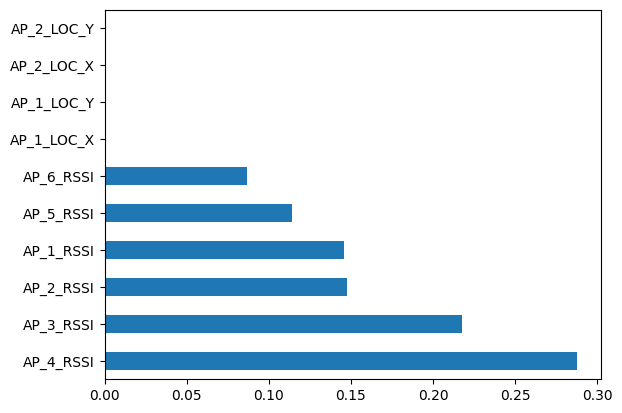

In [12]:
# determine the most important features, for regression model
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [8]:
# 